In [ ]:
# Q2)Hospital-patient dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

In [ ]:
Pdata=pd.read_csv("/content/patient_data.csv")

In [ ]:
Pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         22 non-null     int64 
 1   Gender                      22 non-null     object
 2   Ethnicity                   22 non-null     object
 3   BMI                         22 non-null     int64 
 4   Blood Pressure (systolic)   22 non-null     int64 
 5   Blood Pressure (diastolic)  22 non-null     int64 
 6   Heart Rate                  22 non-null     int64 
 7   Respiratory Rate            22 non-null     int64 
 8   Oxygen Saturation Level     22 non-null     int64 
 9   Chronic Conditions          22 non-null     object
 10  Medications                 22 non-null     object
 11  Lab Test Results            22 non-null     object
 12  Chief Complaint             22 non-null     object
 13  Severity                    22 non-null     object
d

In [ ]:
Pdata.head(5)

,Age,Gender,Ethnicity,BMI,Blood Pressure (systolic),Blood Pressure (diastolic),Heart Rate,Respiratory Rate,Oxygen Saturation Level,Chronic Conditions,Medications,Lab Test Results,Chief Complaint,Severity
0,45,Male,Caucasian,23,120,80,75,16,98,None,None,Normal,Chest Pain,Severe
1,30,Female,Hispanic,27,135,90,80,18,95,Hypertension,None,High Glucose,Headache,Moderate
2,65,Male,African,32,150,100,90,20,92,Diabetes,Insulin,Abnormal Sodium,Shortness of Breath,Severe
3,50,Female,Caucasian,29,140,95,70,14,96,None,Blood thinners,Normal,Chest Pain,Moderate
4,28,Male,Asian,25,115,75,80,16,97,None,None,Normal,Fever,Mild


In [ ]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Severity
Pdata['Severity']= label_encoder.fit_transform(Pdata['Severity'])
Pdata['Severity'].unique()

array([2, 1, 0])

In [ ]:
Pdata.isnull().sum()

Age                           0
Gender                        0
Ethnicity                     0
BMI                           0
Blood Pressure (systolic)     0
Blood Pressure (diastolic)    0
Heart Rate                    0
Respiratory Rate              0
Oxygen Saturation Level       0
Chronic Conditions            0
Medications                   0
Lab Test Results              0
Chief Complaint               0
Severity                      0
dtype: int64

In [ ]:
a=Pdata.select_dtypes(exclude=["object"])

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         22 non-null     int64
 1   BMI                         22 non-null     int64
 2   Blood Pressure (systolic)   22 non-null     int64
 3   Blood Pressure (diastolic)  22 non-null     int64
 4   Heart Rate                  22 non-null     int64
 5   Respiratory Rate            22 non-null     int64
 6   Oxygen Saturation Level     22 non-null     int64
 7   Severity                    22 non-null     int64
dtypes: int64(8)
memory usage: 1.5 KB


In [ ]:
x=a.drop(columns="Severity")
y=a["Severity"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

In [ ]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)
predict=model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#classification report and confusion matrix
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2

    accuracy                           0.43         7
   macro avg       0.33      0.20      0.25         7
weighted avg       0.71      0.43      0.54         7

[[3 0 2]
 [0 0 0]
 [0 2 0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 53.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 KB 31.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 106.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 7.1 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641946 sha256=416202ff454ef2def181053870a13a400178197dd722b9bce9ecacc674bc3d1

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=5e2b05f2d91389edf3520602a69616ec30d96b81b355185cde50b58154702e81
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [ ]:
import joblib

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 69.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
auto-sklearn 0.15.0 requires scikit-learn<0.25.0,>=0.24.0, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import autosklearn.classification
cl=autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=3*60,per_run_time_limit=30)
cl.fit(X_train_scaled,y_train)
pred=cl.predict(X_test_scaled)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f9dd0a56dc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.9/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


In [ ]:
cl.sprint_statistics

<bound method AutoSklearnEstimator.sprint_statistics of AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=30, time_left_for_this_task=180)>

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)

In [ ]:
print(mae)
print(mse)

1.4285714285714286
2.5714285714285716


In [ ]:
cl.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
2,1,0.06,random_forest,0.2,2.119402
17,4,0.04,extra_trees,0.2,2.645580
18,3,0.06,random_forest,0.2,1.637016
32,2,0.08,random_forest,0.2,1.542326
36,5,0.16,random_forest,0.2,2.668604
11,6,0.06,random_forest,0.4,3.402535
12,7,0.06,random_forest,0.4,2.337360
25,8,0.04,random_forest,0.4,1.518175
29,9,0.08,adaboost,0.4,0.921833


In [ ]:
from sklearn.svm import SVC
#support vector classifier
svc = SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [ ]:
predict= model.predict(X_test_scaled)
predict

array([0, 1, 0, 2, 1, 0, 2])

In [ ]:
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2

    accuracy                           0.43         7
   macro avg       0.33      0.20      0.25         7
weighted avg       0.71      0.43      0.54         7

[[3 0 2]
 [0 0 0]
 [0 2 0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#3) Heights

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
  
# creating the Numpy array
arr = np.array([[58, 60], [62, 60], [60, 58],[64, 60], [67, 70], [70, 72]])
   
# creating a list of column names
values = ['mother height', 'daughter height']
  
# creating the dataframe
data = pd.DataFrame(data = arr,columns = values)

In [ ]:
data

,mother height,daughter height
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70
5,70,72


In [ ]:
# Create linear regression object
regmod = linear_model.LinearRegression()
regmod.fit(data.drop('daughter height',axis='columns'), data['daughter height'])

LinearRegression()

In [ ]:
regmod.predict([[63]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62.73031826])

In [ ]:
regmod.coef_

array([1.20603015])

In [ ]:
regmod.intercept_

-13.249581239530976

In [ ]:
#y = mx+b
63 * 1.20603015 + (-13.249581239530976)

62.730318210469015

In [ ]:
1.2*63 - 12.87

62.73

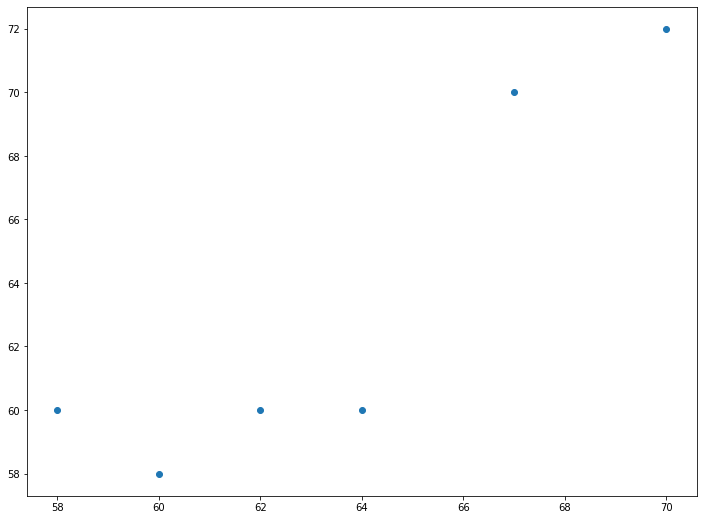

In [ ]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
datap = data
X = datap.iloc[:, 0]
Y = datap.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [ ]:
# Building the model
m = 0
c = 0

u = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - u * D_m  # Update m
    c = c - u * D_c  # Update c
    
print (m, c)

0.9981545673613258 0.004792618921708145


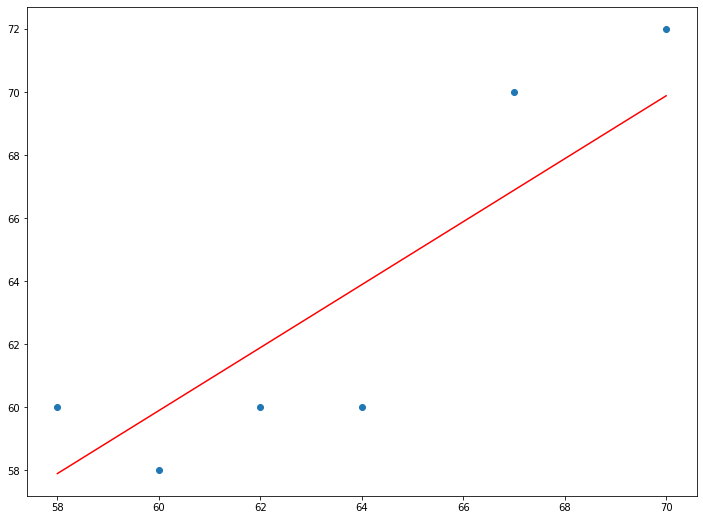

In [ ]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [ ]:
#Q4) residential properties dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

In [ ]:
res=pd.read_csv("/content/residential_properties.csv")
res

,Size (sq ft),Bedrooms,Bathrooms,Location,Year Built,Garage Size,Distance to School (mi),Selling Price (k$)
0,1800,3,2,Downtown,1990,1,0.5,250
1,2200,4,3,Suburban,2005,2,1.2,400
2,1200,2,1,Rural,1985,0,3.6,150
3,3000,5,4,Downtown,2010,3,0.8,700
4,2500,4,3,Suburban,2000,2,2.1,500
5,1400,2,1,Rural,1970,1,2.7,175
6,2000,3,2,Downtown,2008,2,0.3,350
7,1800,3,2,Suburban,1995,1,1.8,300
8,1600,2,1,Rural,1980,0,4.3,125
9,2800,4,3,Downtown,2015,3,0.6,650


In [ ]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Size (sq ft)             19 non-null     int64  
 1   Bedrooms                 19 non-null     int64  
 2   Bathrooms                19 non-null     int64  
 3   Location                 19 non-null     object 
 4   Year Built               19 non-null     int64  
 5   Garage Size              19 non-null     int64  
 6   Distance to School (mi)  19 non-null     float64
 7   Selling Price (k$)       19 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 1.3+ KB


In [ ]:
res.isnull().sum()

Size (sq ft)               0
Bedrooms                   0
Bathrooms                  0
Location                   0
Year Built                 0
Garage Size                0
Distance to School (mi)    0
Selling Price (k$)         0
dtype: int64

In [ ]:
res.dtypes

Size (sq ft)                 int64
Bedrooms                     int64
Bathrooms                    int64
Location                    object
Year Built                   int64
Garage Size                  int64
Distance to School (mi)    float64
Selling Price (k$)           int64
dtype: object

In [ ]:
res.columns

Index(['Size (sq ft)', 'Bedrooms', 'Bathrooms', 'Location', 'Year Built',
       'Garage Size', 'Distance to School (mi)', 'Selling Price (k$)'],
      dtype='object')

In [ ]:
#to remove whitespace
res.columns=res.columns.str.strip()
res.columns

Index(['Size (sq ft)', 'Bedrooms', 'Bathrooms', 'Location', 'Year Built',
       'Garage Size', 'Distance to School (mi)', 'Selling Price (k$)'],
      dtype='object')

In [ ]:
#to replace whitespace with underscore
res.columns=res.columns.str.replace(' ','_')
res.columns

Index(['Size_(sq_ft)', 'Bedrooms', 'Bathrooms', 'Location', 'Year_Built',
       'Garage_Size', 'Distance_to_School_(mi)', 'Selling_Price_(k$)'],
      dtype='object')

In [ ]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Size_(sq_ft)             19 non-null     int64  
 1   Bedrooms                 19 non-null     int64  
 2   Bathrooms                19 non-null     int64  
 3   Location                 19 non-null     object 
 4   Year_Built               19 non-null     int64  
 5   Garage_Size              19 non-null     int64  
 6   Distance_to_School_(mi)  19 non-null     float64
 7   Selling_Price_(k$)       19 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 1.3+ KB


In [ ]:
#to fetch the columns with numerical data types
res_numeric=res.select_dtypes(exclude=['object'])
res_numeric

,Size_(sq_ft),Bedrooms,Bathrooms,Year_Built,Garage_Size,Distance_to_School_(mi),Selling_Price_(k$)
0,1800,3,2,1990,1,0.5,250
1,2200,4,3,2005,2,1.2,400
2,1200,2,1,1985,0,3.6,150
3,3000,5,4,2010,3,0.8,700
4,2500,4,3,2000,2,2.1,500
5,1400,2,1,1970,1,2.7,175
6,2000,3,2,2008,2,0.3,350
7,1800,3,2,1995,1,1.8,300
8,1600,2,1,1980,0,4.3,125
9,2800,4,3,2015,3,0.6,650


In [ ]:
res_numeric.dtypes

Size_(sq_ft)                 int64
Bedrooms                     int64
Bathrooms                    int64
Year_Built                   int64
Garage_Size                  int64
Distance_to_School_(mi)    float64
Selling_Price_(k$)           int64
dtype: object

In [ ]:
#Scaling
from sklearn import preprocessing
resnew=res_numeric.copy()
#scaler=preprocessing.MinMaxScaler()->default feature_range=(0,1)
scalar=preprocessing.MinMaxScaler(feature_range=(0,1))
resnew.iloc[:,:]=scalar.fit_transform(resnew)

In [ ]:
x=resnew.drop(['Selling_Price_(k$)'],axis=1)#independent variable
y=resnew['Selling_Price_(k$)']#dependent variable,continuous variable

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [ ]:
from sklearn.svm import SVR #Support vector classifier 
classifier=SVR(kernel='rbf')  
classifier.fit(x_train, y_train)  
#prediction
prediction=classifier.predict(x_test)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,prediction)
print(mae)
mse=metrics.mean_squared_error(y_test,prediction)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,prediction))
print(rmse)

0.048430443155766945
0.00427023278240555
0.06534701816001667


In [ ]:
classifier.score(x_test,y_test)

0.8898212694379015

In [ ]:
classifier.score(x_train,y_train)

0.9115993556020946

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0, max_iter=100, tol=0.1)
lasso_reg.fit(x_train,y_train)

<ipython-input-66-2299031e6350>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(x_train,y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(x_test,y_test)

0.9334050487985471

In [ ]:
lasso_reg.score(x_train,y_train)

0.9398971836976284

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=2, max_iter=100, tol=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=2, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(x_test,y_test)

0.644933713920079

In [ ]:
ridge_reg.score(x_train,y_train)

0.8507450866302276

In [ ]:
classifier.predict([[3000,4,3,2002,3,2]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([0.40745678])